In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df_StudentScores=pd.read_csv('StudentScores.csv')
df_StudentScores.head()

,school_year,ISDcode,ISDname,district_code,district_name,building_code,building_name,grade,subject_name,subgroup,number_tested,level1_highlyproficient,level2_proficient,level3_notproficient,level4_notproficient,percent_proficient,average_scaled_score
0,13 - 14 School Year,82,Wayne RESA,82010,Detroit City School District,NaN,All Buildings,3,Mathematics,All Students,3580,1.5,13.2,17.6,67.8,0.146,314.41
1,13 - 14 School Year,82,Wayne RESA,82010,Detroit City School District,NaN,All Buildings,3,Mathematics,American Indian or Alaska Native,13,0,30.8,0,69.2,0.308,320.92
2,13 - 14 School Year,82,Wayne RESA,82010,Detroit City School District,NaN,All Buildings,3,Mathematics,Asian,32,6.3,40.6,9.4,43.8,0.469,329.97
3,13 - 14 School Year,82,Wayne RESA,82010,Detroit City School District,NaN,All Buildings,3,Mathematics,Economically Disadvantaged,3191,1.3,12.6,17.6,68.5,0.139,313.95
4,13 - 14 School Year,82,Wayne RESA,82010,Detroit City School District,NaN,All Buildings,3,Mathematics,English Language Learners,556,1.3,11.5,18.5,68.7,0.128,315.46


In [3]:
df_StudentScores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9213 entries, 0 to 9212
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   school_year              9213 non-null   object 
 1   ISDcode                  9213 non-null   int64  
 2   ISDname                  9213 non-null   object 
 3   district_code            9213 non-null   int64  
 4   district_name            9213 non-null   object 
 5   building_code            8960 non-null   float64
 6   building_name            9213 non-null   object 
 7   grade                    9213 non-null   int64  
 8   subject_name             9213 non-null   object 
 9   subgroup                 9213 non-null   object 
 10  number_tested            9213 non-null   object 
 11  level1_highlyproficient  9213 non-null   object 
 12  level2_proficient        9213 non-null   object 
 13  level3_notproficient     9213 non-null   object 
 14  level4_notproficient    

#### I noticed that 'number_tested', 'level1_highlyproficient', 'level2_proficient', 'level3_notproficient', 'level4_notproficient', 'percent_proficient', 'average_scaled_score' are of type 'object', while they're supposed to be numbers.



In [4]:
df_StudentScores.number_tested.unique()

array(['3580', '13', '32', '3191', '556', '2882', '545', '1747', '1833',
       '389', '3024', '11', '97', '263', '267', '10', '3043', '< 10',
       '1841', '1753', '536', '391', '3203', '551', '29', '2908', '3594',
       '3316', '46', '2905', '2704', '522', '1646', '486', '1670', '411',
       '2794', '63', '246', '249', '2803', '1668', '1650', '408', '478',
       '2910', '515', '43', '2717', '3318', '3320', '483', '518', '2714',
       '410', '2802', '247', '274', '99', '2804', '425', '1651', '1672',
       '485', '519', '2682', '2898', '3323', '2690', '41', '2904', '509',
       '477', '1648', '416', '2811', '101', '275', '105', '2925', '448',
       '1742', '424', '1722', '505', '2797', '539', '3016', '3464',
       '3225', '57', '2806', '468', '2666', '436', '1616', '1609', '320',
       '419', '2757', '61', '62', '323', '2771', '418', '1617', '434',
       '2677', '2815', '462', '55', '3233', '3346', '54', '475', '2912',
       '1660', '1686', '2871', '67', '457', '350', '2697

#### The reason is that the string '< 10' is among the values of the above fields



In [5]:
df_EducatorEffectiveness=pd.read_csv('EducatorEffectivenessSnapshot.csv', skiprows=6)
df_EducatorEffectiveness.head()

,location,school_year,highly_effective,highly_effective_percent,effective,effective_percent,minimally_effective,minimally_effective_percent,ineffective,ineffective_percent,effective_or_more_percent,total
0,Detroit City School District,2013-14,2542.0,0.79,541.0,0.17,73.0,0.02,52.0,0.02,0.96,3208.0
1,Statewide,2013-14,36384.0,0.38,56814.0,0.59,2168.0,0.02,519.0,0.01,0.97,95885.0
2,Academy of The Americas,2013-14,30.0,0.83,5.0,0.14,0.0,0.00,1.0,0.03,0.97,36.0
3,Administrative Unit,2013-14,31.0,0.65,17.0,0.35,0.0,0.00,0.0,0.00,1.00,48.0
4,Ann Arbor Trail Magnet School,2013-14,23.0,0.92,2.0,0.08,0.0,0.00,0.0,0.00,1.00,25.0


* The rows where the 'subgroup' and 'subject_name' columns have values of 'All Students' and 'Mathematics' respectively are the rows that we should consider in our analysis.


In [6]:
df_StudentScores[(df_StudentScores['subject_name']=='Mathematics') & (df_StudentScores['subgroup']=='All Students')]

,school_year,ISDcode,ISDname,district_code,district_name,building_code,building_name,grade,subject_name,subgroup,number_tested,level1_highlyproficient,level2_proficient,level3_notproficient,level4_notproficient,percent_proficient,average_scaled_score
0,13 - 14 School Year,82,Wayne RESA,82010,Detroit City School District,NaN,All Buildings,3,Mathematics,All Students,3580,1.5,13.2,17.6,67.8,0.146,314.41
29,13 - 14 School Year,82,Wayne RESA,82010,Detroit City School District,NaN,All Buildings,4,Mathematics,All Students,3316,1.4,15.8,14,68.8,0.172,412.41
87,13 - 14 School Year,82,Wayne RESA,82010,Detroit City School District,NaN,All Buildings,5,Mathematics,All Students,3323,0.5,15,15.4,69.1,0.154,507.18
116,13 - 14 School Year,82,Wayne RESA,82010,Detroit City School District,NaN,All Buildings,6,Mathematics,All Students,3225,1.1,13.7,13.2,72,0.148,604.74
168,13 - 14 School Year,82,Wayne RESA,82010,Detroit City School District,NaN,All Buildings,7,Mathematics,All Students,3086,0.7,11.1,18.8,69.4,0.118,706.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9090,13 - 14 School Year,82,Wayne RESA,82010,Detroit City School District,9992.0,"Clark, J.E. Preparatory Academy",4,Mathematics,All Students,52,0,15.4,23.1,61.5,0.154,415.12
9114,13 - 14 School Year,82,Wayne RESA,82010,Detroit City School District,9992.0,"Clark, J.E. Preparatory Academy",5,Mathematics,All Students,57,0,5.3,5.3,89.5,0.053,500.04
9138,13 - 14 School Year,82,Wayne RESA,82010,Detroit City School District,9992.0,"Clark, J.E. Preparatory Academy",6,Mathematics,All Students,72,0,2.8,5.6,91.7,0.028,594.67
9162,13 - 14 School Year,82,Wayne RESA,82010,Detroit City School District,9992.0,"Clark, J.E. Preparatory Academy",7,Mathematics,All Students,100,0,4,12,84,0.04,698.75


* The rows where the 'building_name' column has the value 'All Buildings' are accumulative rows having the sum of the values of all schools. We should exclude these rows from our analysis, since we need the per-school statistics.

In [7]:
df_StudentScores[(df_StudentScores['subject_name']=='Mathematics') & (df_StudentScores['subgroup']=='All Students') & (df_StudentScores['building_name']=='All Buildings')]

,school_year,ISDcode,ISDname,district_code,district_name,building_code,building_name,grade,subject_name,subgroup,number_tested,level1_highlyproficient,level2_proficient,level3_notproficient,level4_notproficient,percent_proficient,average_scaled_score
0,13 - 14 School Year,82,Wayne RESA,82010,Detroit City School District,NaN,All Buildings,3,Mathematics,All Students,3580,1.5,13.2,17.6,67.8,0.146,314.41
29,13 - 14 School Year,82,Wayne RESA,82010,Detroit City School District,NaN,All Buildings,4,Mathematics,All Students,3316,1.4,15.8,14,68.8,0.172,412.41
87,13 - 14 School Year,82,Wayne RESA,82010,Detroit City School District,NaN,All Buildings,5,Mathematics,All Students,3323,0.5,15,15.4,69.1,0.154,507.18
116,13 - 14 School Year,82,Wayne RESA,82010,Detroit City School District,NaN,All Buildings,6,Mathematics,All Students,3225,1.1,13.7,13.2,72,0.148,604.74
168,13 - 14 School Year,82,Wayne RESA,82010,Detroit City School District,NaN,All Buildings,7,Mathematics,All Students,3086,0.7,11.1,18.8,69.4,0.118,706.06
198,13 - 14 School Year,82,Wayne RESA,82010,Detroit City School District,NaN,All Buildings,8,Mathematics,All Students,3024,1.8,10.4,17.5,70.3,0.122,801.4


In [8]:
# This dataframe includes all the rows with 'subject_name' of 'Mathematics', 'subgroup' of 'All Students'
# It excludes the rows having 'All Buildings' as 'buildingName', and those having '< 10' as 'number_tested'
df_StudentScores_maths_school=df_StudentScores[(df_StudentScores['subject_name']=='Mathematics') & (df_StudentScores['subgroup']=='All Students') & (df_StudentScores['building_name']!='All Buildings') & (df_StudentScores['number_tested']!='< 10')]#['number_tested'].unique()
df_StudentScores_maths_school.head()

,school_year,ISDcode,ISDname,district_code,district_name,building_code,building_name,grade,subject_name,subgroup,number_tested,level1_highlyproficient,level2_proficient,level3_notproficient,level4_notproficient,percent_proficient,average_scaled_score
253,13 - 14 School Year,82,Wayne RESA,82010,Detroit City School District,4.0,Henderson Academy,3,Mathematics,All Students,82,0,6.1,11,82.9,0.061,306.16
272,13 - 14 School Year,82,Wayne RESA,82010,Detroit City School District,4.0,Henderson Academy,4,Mathematics,All Students,65,0,7.7,12.3,80,0.077,404.63
304,13 - 14 School Year,82,Wayne RESA,82010,Detroit City School District,4.0,Henderson Academy,5,Mathematics,All Students,58,0,5.2,3.4,91.4,0.052,494.98
328,13 - 14 School Year,82,Wayne RESA,82010,Detroit City School District,4.0,Henderson Academy,6,Mathematics,All Students,69,0,0,1.4,98.6,0,587.99
361,13 - 14 School Year,82,Wayne RESA,82010,Detroit City School District,4.0,Henderson Academy,7,Mathematics,All Students,95,0,6.3,11.6,82.1,0.063,698.83


In [9]:
# Here I convert the 'number_stated', 'level1_highlyproficient', and 'level2_proficient' to number formats.
# I also added a new column to calculate the number of level1 & level2 students in each school/grade.
df_StudentScores_maths_school['number_tested']=df_StudentScores_maths_school['number_tested'].astype(int)
df_StudentScores_maths_school['level1_highlyproficient']=df_StudentScores_maths_school['level1_highlyproficient'].astype(float)
df_StudentScores_maths_school['level2_proficient']=df_StudentScores_maths_school['level2_proficient'].astype(float)
df_StudentScores_maths_school['proficient_and_higher']=(df_StudentScores_maths_school['number_tested']*(df_StudentScores_maths_school['level1_highlyproficient']+df_StudentScores_maths_school['level2_proficient'])/100).apply(np.round).astype(int)
df_StudentScores_maths_school.head()

c:\users\hedey\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\hedey\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\hedey\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWith

,school_year,ISDcode,ISDname,district_code,district_name,building_code,building_name,grade,subject_name,subgroup,number_tested,level1_highlyproficient,level2_proficient,level3_notproficient,level4_notproficient,percent_proficient,average_scaled_score,proficient_and_higher
253,13 - 14 School Year,82,Wayne RESA,82010,Detroit City School District,4.0,Henderson Academy,3,Mathematics,All Students,82,0.0,6.1,11,82.9,0.061,306.16,5
272,13 - 14 School Year,82,Wayne RESA,82010,Detroit City School District,4.0,Henderson Academy,4,Mathematics,All Students,65,0.0,7.7,12.3,80,0.077,404.63,5
304,13 - 14 School Year,82,Wayne RESA,82010,Detroit City School District,4.0,Henderson Academy,5,Mathematics,All Students,58,0.0,5.2,3.4,91.4,0.052,494.98,3
328,13 - 14 School Year,82,Wayne RESA,82010,Detroit City School District,4.0,Henderson Academy,6,Mathematics,All Students,69,0.0,0.0,1.4,98.6,0,587.99,0
361,13 - 14 School Year,82,Wayne RESA,82010,Detroit City School District,4.0,Henderson Academy,7,Mathematics,All Students,95,0.0,6.3,11.6,82.1,0.063,698.83,6


#### Here is how the first 10 rows of data will look like if I grouped by 'building_name' and 'grade'

In [10]:
df_StudentScores_maths_school.groupby(['building_name','grade']).sum()[['number_tested', 'proficient_and_higher']].head(10)

number_tested  proficient_and_higher
building_name                 grade                                      
Academy of The Americas       3                 82                      7
                              4                 74                     13
                              5                 82                     13
                              6                 74                      9
                              7                 57                      7
                              8                 64                      9
Ann Arbor Trail Magnet School 3                 38                      9
                              4                 51                      8
                              5                 52                      5
                              6                 38                      1

In [11]:
# Group by 'building_name' to obtain the total 'number_tested', and 'proficient_and_higher' students per school
df_math_prof=df_StudentScores_maths_school.groupby(['building_name']).sum()[['number_tested', 'proficient_and_higher']].reset_index()
df_math_prof.head(10)

,building_name,number_tested,proficient_and_higher
0,Academy of The Americas,433,58
1,Ann Arbor Trail Magnet School,268,30
2,Bagley Elementary School,167,29
3,Bates Academy,565,277
4,Bennett Elementary School,178,31
5,Blackwell Institute,211,8
6,Bow Elementary-Middle School,251,32
7,Brewer Elementary-Middle School,350,53
8,"Brown, Ronald Academy",330,63
9,Bunche Elementary-Middle School,228,31


In [12]:
# Add a column for the percentage of level1 & level2 students in each school
df_math_prof['prof_percent']=df_math_prof['proficient_and_higher']/df_math_prof['number_tested']
df_math_prof.head(10)

,building_name,number_tested,proficient_and_higher,prof_percent
0,Academy of The Americas,433,58,0.133949
1,Ann Arbor Trail Magnet School,268,30,0.111940
2,Bagley Elementary School,167,29,0.173653
3,Bates Academy,565,277,0.490265
4,Bennett Elementary School,178,31,0.174157
5,Blackwell Institute,211,8,0.037915
6,Bow Elementary-Middle School,251,32,0.127490
7,Brewer Elementary-Middle School,350,53,0.151429
8,"Brown, Ronald Academy",330,63,0.190909
9,Bunche Elementary-Middle School,228,31,0.135965


### Top-10 Mathematics 'Proficint+' schools: 

In [23]:
# Sort the table descendingly by prof_percent, and keep only the first 10 rows (Top-10 schools)
df_math_prof_top_ten=df_math_prof.sort_values('prof_percent', ascending=False).iloc[:10,:]
df_math_prof_top_ten.reset_index(drop=True, inplace=True)
df_math_prof_top_ten

,building_name,number_tested,proficient_and_higher,prof_percent
0,"Wright, Charles School",179,112,0.625698
1,Chrysler Elementary School,92,52,0.565217
2,Bates Academy,565,277,0.490265
3,Davison Elementary-Middle School,434,199,0.458525
4,Burton International School,364,134,0.368132
5,Dixon Elementary School,476,169,0.355042
6,Pasteur Elementary School,163,43,0.263804
7,Greenfield Union Elementary-Middle School,155,38,0.245161
8,Thirkell Elementary School,255,60,0.235294
9,Cooke Elementary School,179,41,0.229050


In [24]:
# Export the dataframe to a .csv file
df_math_prof_top_ten.to_csv('top_10_maths_pro_schools.csv', index=False)

### Relationship between Maths proficiency and Educator effectiveness:

In [25]:
# Now, I'll merge the df_math_prof with the df_EducatorEffectiveness to explore the relationship between Maths proficincy and educator effectiveness
df_math_prof_effectiveness=df_math_prof.merge(df_EducatorEffectiveness, left_on='building_name', right_on='location', how='inner')
df_math_prof_effectiveness.head(10)

,building_name,number_tested,proficient_and_higher,prof_percent,location,school_year,highly_effective,highly_effective_percent,effective,effective_percent,minimally_effective,minimally_effective_percent,ineffective,ineffective_percent,effective_or_more_percent,total
0,Academy of The Americas,433,58,0.133949,Academy of The Americas,2013-14,30.0,0.83,5.0,0.14,0.0,0.00,1.0,0.03,0.97,36.0
1,Ann Arbor Trail Magnet School,268,30,0.111940,Ann Arbor Trail Magnet School,2013-14,23.0,0.92,2.0,0.08,0.0,0.00,0.0,0.00,1.00,25.0
2,Bagley Elementary School,167,29,0.173653,Bagley Elementary School,2013-14,15.0,0.71,4.0,0.19,2.0,0.10,0.0,0.00,0.90,21.0
3,Bates Academy,565,277,0.490265,Bates Academy,2013-14,38.0,0.97,1.0,0.03,0.0,0.00,0.0,0.00,1.00,39.0
4,Bennett Elementary School,178,31,0.174157,Bennett Elementary School,2013-14,23.0,0.88,3.0,0.12,0.0,0.00,0.0,0.00,1.00,26.0
5,Blackwell Institute,211,8,0.037915,Blackwell Institute,2013-14,16.0,0.57,10.0,0.36,2.0,0.07,0.0,0.00,0.93,28.0
6,Bow Elementary-Middle School,251,32,0.127490,Bow Elementary-Middle School,2013-14,19.0,0.56,14.0,0.41,1.0,0.03,0.0,0.00,0.97,34.0
7,Brewer Elementary-Middle School,350,53,0.151429,Brewer Elementary-Middle School,2013-14,25.0,0.81,4.0,0.13,2.0,0.06,0.0,0.00,0.94,31.0
8,"Brown, Ronald Academy",330,63,0.190909,"Brown, Ronald Academy",2013-14,36.0,0.80,8.0,0.18,1.0,0.02,0.0,0.00,0.98,45.0
9,Bunche Elementary-Middle School,228,31,0.135965,Bunche Elementary-Middle School,2013-14,37.0,0.90,2.0,0.05,1.0,0.03,1.0,0.02,0.95,41.0


In [26]:
# Keep only the location and percentages columns
df_percents=pd.concat([df_math_prof_effectiveness[['location']], df_math_prof_effectiveness.loc[:,df_math_prof_effectiveness.columns.str.endswith('percent')]], axis=1)
df_percents.head(10)

,location,prof_percent,highly_effective_percent,effective_percent,minimally_effective_percent,ineffective_percent,effective_or_more_percent
0,Academy of The Americas,0.133949,0.83,0.14,0.00,0.03,0.97
1,Ann Arbor Trail Magnet School,0.111940,0.92,0.08,0.00,0.00,1.00
2,Bagley Elementary School,0.173653,0.71,0.19,0.10,0.00,0.90
3,Bates Academy,0.490265,0.97,0.03,0.00,0.00,1.00
4,Bennett Elementary School,0.174157,0.88,0.12,0.00,0.00,1.00
5,Blackwell Institute,0.037915,0.57,0.36,0.07,0.00,0.93
6,Bow Elementary-Middle School,0.127490,0.56,0.41,0.03,0.00,0.97
7,Brewer Elementary-Middle School,0.151429,0.81,0.13,0.06,0.00,0.94
8,"Brown, Ronald Academy",0.190909,0.80,0.18,0.02,0.00,0.98
9,Bunche Elementary-Middle School,0.135965,0.90,0.05,0.03,0.02,0.95


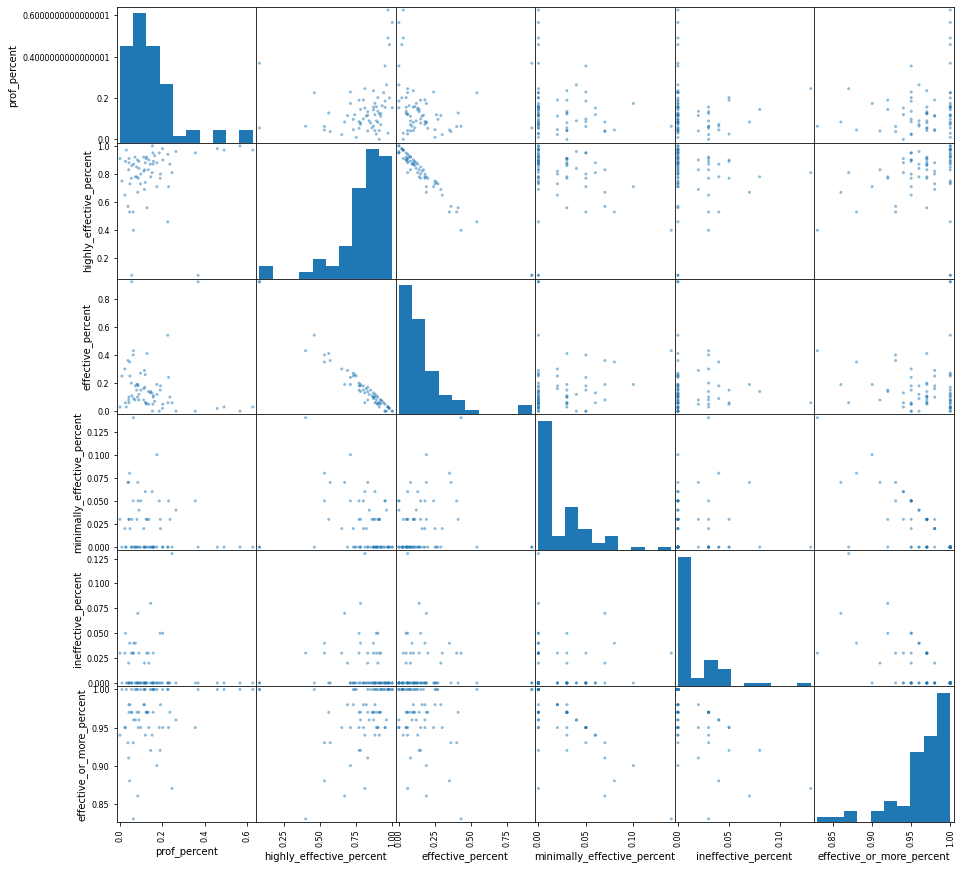

In [31]:
# Plot the scatter matrix to take an idea about the relationships
pd.plotting.scatter_matrix(df_percents, figsize=(15,15));

#### The above scatter plots don't show strong releationships between the prof_percent and the effectiveness percentages

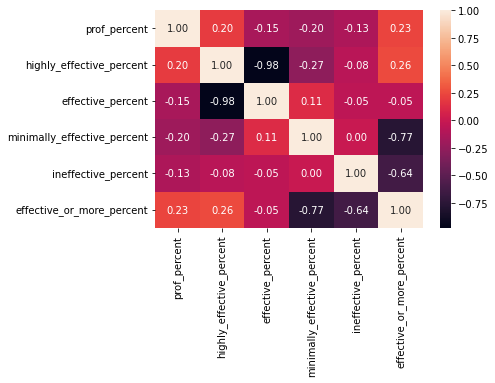

In [28]:
# Explore the correlation between the prof_percent, and the effectiveness percentages
sns.heatmap(df_percents.corr(), annot=True, fmt=".2f");

### Conclusion:

* The above correlation heatmap show a weak positive correlation between 'prof_percent' and 'highly_effective_percent' (0.2), and between 'prof_percent' and 'effective_or_more_percent' (0.23). In other words, Maths proficincy tends to increase whenever 'highly_effective_percent' and 'effective_or_more_percent' increase.
* The heatmap also shows weak negative correlations between 'prof_percent' and the 3 other effectiveness percentages: ['effective_percent' (-0.15), 'minimally_effective_percent' (-0.2), and 'ineffective_percent' (-0.13)], which suggest that Maths proficiency tends to decrease when those 3 effectivess percentages increase.

